(path-analysis-notebook)=
# Analisi dei percorsi

In [1]:
# devtools::install_github("alishinski/lavaanPlot")
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("lavaanPlot")
    library("lavaanExtra")
    library("DiagrammeRsvg")
    library("rsvg")
    library("diagram")
})

set.seed(42)
options(repr.plot.width=6, repr.plot.height=6)

Le visualizzazioni rivestono un ruolo fondamentale nel comunicare in modo chiaro e sintetico le intricate relazioni tra variabili. Questo è particolarmente evidente quando si opera con modelli di equazioni strutturali (SEM) che delineano una rete di interconnessioni tra variabili sia osservabili che latenti. In tali contesti, i ricercatori frequentemente si avvalgono di strumenti grafici per agevolare la specificazione e l'esplicitazione del modello, oltre che per presentare in maniera comprensibile i risultati ottenuti.

L'analisi del percorso, comunemente denominata "path analysis," costituisce una metodologia finalizzata alla disassemblaggio della correlazione o covarianza esistente tra variabili, con l'obiettivo di rivelare e descrivere le intricate relazioni tra di esse. Questo approccio si fonda sulla creazione di rappresentazioni grafiche che evidenziano le interrelazioni tra le variabili, offrendo una visualizzazione visuale di come i diversi fattori si influenzino reciprocamente. Inoltre, l'analisi del percorso prevede una scomposizione delle correlazioni o covarianze utilizzando i parametri del modello, trasformando dati complessi in una struttura più comprensibile.

Sewall Wright, un genetista che operava presso il Dipartimento dell'Agricoltura degli Stati Uniti, fu il precursore nello sviluppo dei diagrammi di percorso per descrivere i modelli di equazioni strutturali già negli anni '20 del secolo scorso. Questa sua innovazione ha permesso di ottenere una rappresentazione visiva delle connessioni tra variabili, aprendo la strada all'analisi del percorso.

Con il trascorrere del tempo, questa metodologia è stata adottata con successo come uno strumento efficace per discriminare gli effetti diretti da quelli indiretti nelle relazioni tra variabili. Inoltre, essa si è dimostrata di grande utilità nel valutare la solidità e la validità delle relazioni causali ipotizzate all'interno dei modelli di equazioni strutturali.

## Path diagram

Il diagramma del percorso, noto anche come "path diagram," costituisce uno strumento per la rappresentazione grafica delle relazioni tra variabili all'interno di un modello. All'interno di questo diagramma, le variabili latenti o non osservate sono rappresentate mediante cerchi o ellissi, mentre le variabili osservate sono rappresentate da quadrati o rettangoli. 

All'interno del path diagram, è possibile individuare due categorie di variabili: quelle che subiscono influenze da parte di altre variabili nel sistema e quelle che svolgono il ruolo di generatori di effetti. Nello specifico, le variabili esogene costituiscono elementi esterni al sistema in esame, operando in qualità di variabili indipendenti che generano effetti causalmente. Al contrario, le variabili endogene possono agire sia come risultati di altre variabili che come cause per ulteriori variabili, oppure possono essere strettamente variabili dipendenti. Le origini causali delle variabili endogene trovano collocazione all'interno del path diagram, mentre quelle delle variabili esogene si trovano esternamente al diagramma. Tale distinzione presenta affinità con la distinzione tra variabili indipendenti e dipendenti all'interno dei modelli lineari.

Il diagramma di percorso mette in evidenza le interazioni tra le variabili d'interesse, sottolineando i legami causali o associativi che le connettono. Le frecce unidirezionali illustrano relazioni causali: una variabile subisce influenza da un'altra variabile collegata attraverso una freccia. Invece, le frecce curve bidirezionali denotano relazioni associative, senza implicare una causalità diretta tra le variabili. L'assenza di una freccia tra due variabili nel diagramma suggerisce l'assenza di correlazione tra di esse. Nel caso esemplificato, si illustrano le relazioni tra nove variabili osservate e tre variabili latenti mediante il path diagram.

```{figure} images/path_01.png
---
height: 450px
name: path_01-fig
---
Diagramma di percorso per un modello a tre fattori comuni.
```

## Analisi dei percorsi e regressione bivariata

Cominciamo esaminando l'analisi dei percorsi partendo dall'esempio più semplice, ovvero il modello di regressione lineare. Il modello di regressione bivariata si esprime tramite l'equazione seguente:

$$ y_1 = b_0 + b_1 x_1 + \epsilon_1 $$

Dove $ y $ rappresenta la variabile dipendente, $ b_0 $ rappresenta l'intercetta, $ b_1 $ rappresenta la pendenza della retta di regressione, $ x $ è la variabile indipendente e $ \epsilon $ è il termine di errore.

Nell'ambito della descrizione delle relazioni tra variabili manifeste e latenti, si adotta spesso la notazione LISREL. In questa notazione, il modello presentato in precedenza può essere espresso come segue:

$$ y_1 = \alpha + \gamma x_1 + \zeta_1 $$

Dove:

- $ x_1 $: variabile esogena singola
- $ y_1 $: variabile endogena singola
- $ \alpha $: intercetta di $ y_1 $
- $ \gamma_1 $: coefficiente di regressione
- $ \zeta_1 $: termine di errore di $ y_1 $
- $ \phi $: varianza o covarianza della variabile esogena
- $ \psi $: varianza o covarianza residuale della variabile endogena

Il diagramma di percorso per il modello di regressione bivariata è illustrato nella figura sottostante.

```{figure} images/lisrel_bivariate_reg.png
---
height: 225px
name: lisrel_bivariate_reg-fig
---
Diagramma di percorso per il modello di regressione bivariato.
```

Facciamo un esempio numerico. Simuliamo tre variabili: x1, x2, y.

In [2]:
set.seed(42)
n <- 100
x1 <- rnorm(n, 90, 20)
x2 <- x1 + rnorm(n, 0, 30)
y <- 25 + 0.5 * x1 + 1.0 * x2 + rnorm(n, 0, 30)

cor(cbind(x1, x2, y))

dat <- data.frame(
    y, x1, x2
)

,x1,x2,y
x1,1.0000000,0.6244502,0.5493286
x2,0.6244502,1.0000000,0.7992614
y,0.5493286,0.7992614,1.0000000


Consideriamo la relazione tra `x1` (variabile endogena) e `y` (variabile endogena). In R possiamo adattare ai dati un modello di regressione mediante la funzione `lm`.

In [3]:
m1a <- lm(y ~ x1, data = dat)
summary(m1a) |>
    print()


Call:
lm(formula = y ~ x1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.462 -29.539  -3.437  29.200 122.234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.5974    18.9844   1.980   0.0505 .  
x1            1.3286     0.2042   6.508 3.25e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 42.31 on 98 degrees of freedom
Multiple R-squared:  0.3018,	Adjusted R-squared:  0.2946 
F-statistic: 42.35 on 1 and 98 DF,  p-value: 3.251e-09



Usiamo ora lavaan per adattare lo stesso modello ai dati.

In [4]:
m1b <- "
    y ~ 1 + x1
    x1 ~~ x1
"
fit1b <- sem(m1b, data = dat)
parameterEstimates(fit1b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       37.597  18.794  2.001  0.045    0.763   74.432
2   y  ~  x1    1.329   0.202  6.574  0.000    0.933    1.725
3  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
4   y ~~   y 1754.100 248.067  7.071  0.000 1267.897 2240.303
5  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712


L'intercetta di `.y` (37.597) e il coefficiente di regressione di `y ~ x1` (1.329) corrispondono all'output di `lm()` con piccoli errori di arrotondamento. Si noti che il punto (.) davanti al parametro indica una variabile endogena sotto `Intercepts` e una varianza residua se sotto `Variances` o `Covariances`. L'intercetta per `x1` (90.650) non ha un punto (.) né la sua varianza (429.432), indicando che si tratta di una media ed una varianza esogena. La media ed la varianza esogene corrispondono alla media e alla varianza univariate come mostrato di seguito:

In [5]:
mean(dat$x1)

[1] 90.6503

In [6]:
var(dat$x1) * (length(dat$x1) - 1) / length(dat$x1)

[1] 429.432

La funzione `semPaths` consente di creare un diagramma di percorso a partire dall'oggetto creato da `sem`.

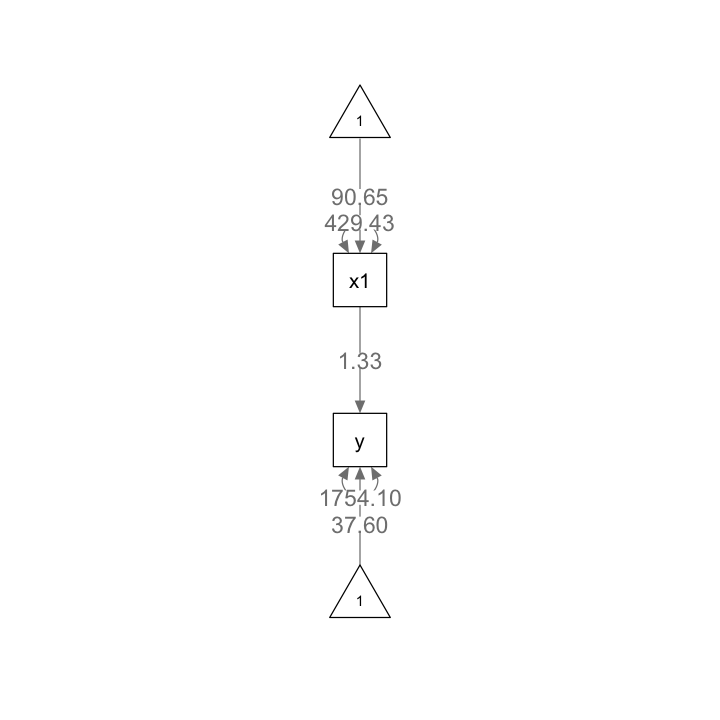

In [7]:
semPlot::semPaths(
    fit1b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram", 
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Analisi dei percorsi e regressione multipla

<!-- Vi è una stretta relazione tra path analysis e regressione multipla,
tanto che la regressione può essere considerata un caso particolare di
path analysis. Per semplicità, si supponga che le variabili siano state
standardizzate, anche se la stessa analisi può essere condotta per
variabili grezze. Il path diagram mostra la relazione tra tutte le
variabili, comprendendo anche i fattori di disturbo, e fornisce dunque
la rappresentazione grafica di un sistema di equazioni simultanee. Nel
caso di due regressori, il modello di regressione multipla può essere
rappresentato tramite il path diagram riportato nella
figura seguente. -->

La regressione semplice è limitata a una sola variabile esogena. Nella pratica, un ricercatore può essere interessato a studiare come un gruppo di variabili esogene possano predire una variabile di esito. Supponiamo di avere ancora una sola variabile di esito endogena ma due predittori esogeni; questo caso è noto come regressione multipla:

$$
y_1 = \alpha_1 + \gamma_1 x_1 + \gamma_2 x_2 + \zeta_1
$$

Il diagramma di percorso mostra la relazione tra tutte le variabili, comprendendo anche i fattori di disturbo, e fornisce dunque la rappresentazione grafica dell'equazione precedente.

```{figure} images/lisrel_mr.png
---
height: 300px
name: lisrel_mr-fig
---
Diagramma di percorso per il modello di regressione multipla.
```

I coefficienti di percorso associati alle frecce orientate esprimono la portata del nesso causale e corrispondono ai pesi beta (ovvero ai coefficienti parziali di regressione standardizzati). Le frecce non orientate esprimono la portata della pura associazione tra variabili e dunque corrispondono alle correlazioni/covarianze.

In un diagramma di percorso, il numero di equazioni corrisponde al numero di variabili endogene del modello. Nel caso specifico, poiché vi è una sola variabile endogena (ovvero $y$), esiste un'unica equazione che descrive le relazioni causalitiche interne al path diagram. All'interno di ciascuna equazione, inoltre, il numero di termini corrisponde al numero di frecce orientate che puntano verso la variabile endogena. Nell'esempio sopra citato, pertanto, la sola equazione del modello contiene tre termini, ciascuno associato ad una freccia orientata.

Usando `lm` otteniamo la seguente stima dei coefficienti:

In [8]:
m2a <- lm(y ~ 1 + x1 + x2, data = dat)
fit2a <- summary(m2a) |>
    print()


Call:
lm(formula = y ~ 1 + x1 + x2, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.299 -19.856  -2.476  19.112  75.617 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.4537    13.6639   3.253  0.00157 ** 
x1            0.1991     0.1879   1.060  0.29179    
x2            1.0853     0.1127   9.628 8.54e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.41 on 97 degrees of freedom
Multiple R-squared:  0.643,	Adjusted R-squared:  0.6356 
F-statistic: 87.34 on 2 and 97 DF,  p-value: < 2.2e-16



Gli stessi risultati si ottengono con lavaan.

In [9]:
m2b <- "
    y ~ 1 + x1 + x2
    x1 ~~ x1
    x2 ~~ x2
    x1 ~~ x2
"
fit2b <- sem(m2b, data = dat)
parameterEstimates(fit2b) |>
    print()


  lhs op rhs      est      se      z pvalue ci.lower ci.upper
1   y ~1       44.454  13.457  3.303  0.001   18.078   70.830
2   y  ~  x1    0.199   0.185  1.076  0.282   -0.164    0.562
3   y  ~  x2    1.085   0.111  9.775  0.000    0.868    1.303
4  x1 ~~  x1  429.432  60.731  7.071  0.000  310.402  548.462
5  x2 ~~  x2 1192.840 168.693  7.071  0.000  862.208 1523.472
6  x1 ~~  x2  446.927  84.379  5.297  0.000  281.546  612.307
7   y ~~   y  896.963 126.850  7.071  0.000  648.342 1145.584
8  x1 ~1       90.650   2.072 43.744  0.000   86.589   94.712
9  x2 ~1       88.026   3.454 25.487  0.000   81.257   94.795


Esaminiamo il diagramma di percorso.

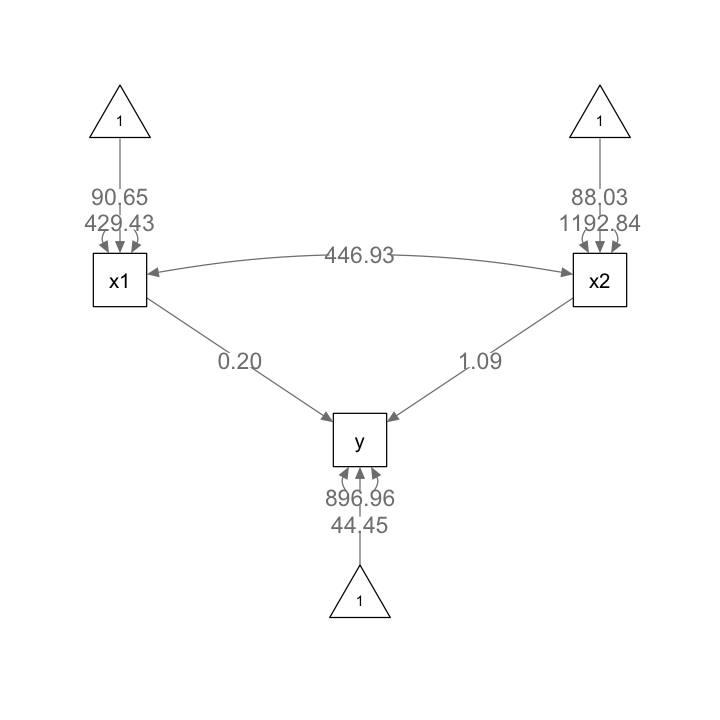

In [10]:
semPlot::semPaths(
    fit2b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Effetti diretti e indiretti

L'analisi del percorso offre un metodo essenziale per distinguere tra diverse tipologie di effetti che influenzano le variabili in esame: l'effetto diretto, l'effetto indiretto e l'effetto totale. Gli effetti diretti rappresentano l'influenza che una variabile esercita su un'altra senza mediazione di altre variabili intermedie. Gli effetti indiretti, invece, operano attraverso l'intermediazione di almeno una variabile aggiuntiva nel processo. L'effetto totale è la somma cumulativa degli effetti diretti e indiretti.

Nella figura qui di seguito, la variabile $y_1$ esercita un effetto diretto sulla variabile $y_2$. Allo stesso tempo, $y_1$ produce un effetto indiretto sulla variabile $y_3$, poiché non esiste una connessione causale diretta tra $y_1$ e $y_3$. Nel contesto rappresentato, la variabile $y_1$ agisce come variabile esogena, mentre le variabili $y_2$ e $y_3v fungono da variabili endogene.

```{figure} images/path_03.png
---
height: 100px
name: path_03-fig
---
Diagramma di percorso per un modello a catena.
```

## Le regole di Wright

L'obiettivo primario dell'analisi del percorso consiste nella decomposizione della correlazione (o della covarianza) in base alla somma dei vari percorsi (diretti e indiretti) che collegano due variabili mediante coefficienti noti come "path coefficients." Utilizzando il diagramma del percorso, Sewall Wright (1921, 1934) formulò le regole che, tramite le "tracing rules," stabiliscono il collegamento tra le correlazioni (o covarianze) delle variabili e i parametri del modello. Le tracing rules si possono esprimere nei seguenti termini:

- È possibile procedere in avanti lungo una freccia e poi a ritroso, seguendo la direzione della freccia, ma non è permesso muoversi in avanti e poi tornare indietro.
- Un percorso composto non deve attraversare più di una volta la stessa variabile, cioè non possono esserci cicli.
- Un percorso non può contenere più di una linea curva.

Il termine "percorso" fa riferimento al tracciato che connette due variabili e si compone di sequenze di frecce unidirezionali e curve non direzionali. A ciascun percorso valido (cioè conforme alle regole di Wright) viene assegnato un valore numerico che rappresenta il prodotto dei coefficienti presenti lungo il percorso stesso. I coefficienti di percorso possono essere coefficienti parziali di regressione standardizzati se il legame è unidirezionale, oppure coefficienti di correlazione se il legame è bidirezionale.

## Scomposizione delle correlazioni/covarianze

Il principio fondamentale è stato formulato da Sewall Wright (1934) nel seguente modo:

> Ogni correlazione tra variabili in una rete di relazioni sequenziali può essere analizzata nei contributi provenienti da tutti i percorsi (diretti o attraverso fattori comuni) con i quali le due variabili sono connesse. Ogni contributo ha un valore pari al prodotto dei coefficienti relativi ai percorsi elementari. Se sono presenti correlazioni residue (rappresentate da frecce bidirezionali), uno (ma mai più di uno) dei coefficienti moltiplicati per ottenere il contributo del percorso di connessione può essere un coefficiente di correlazione. Gli altri sono tutti coefficienti di percorso.

Da questo principio possiamo derivare la regola di scomposizione della correlazione: la correlazione o covarianza tra due variabili può essere scomposta in un numero di termini uguale al numero di percorsi che le collegano. Ogni termine è ottenuto dal prodotto dei coefficienti associati alle variabili lungo il percorso. In altre parole, è possibile decomporre la correlazione o la covarianza tra due variabili in tanti contributi quanti sono i percorsi possibili che collegano le due variabili.

### Scomposizione della varianza

La decomposizione della varianza di una variabile endogena può essere affrontata attraverso una suddivisione in due componenti: una componente spiegata, attribuibile alle variabili che esercitano un'influenza causale su di essa, e una componente non spiegata. La componente spiegata della varianza deriva dall'aggregazione degli effetti delle diverse variabili che sono connessi alla variabile endogena, rispettando le regole di tracciamento definite da Wright. Il numero di addendi corrisponde al numero di percorsi che collegano la variabile endogena a se stessa. In tal modo, la varianza spiegata rappresenta la parte della varianza totale della variabile endogena che può essere attribuita alle influenze delle variabili correlate attraverso i percorsi definibili all'interno del modello.

### Relazioni tra variabili endogene e esogene

Complessivamente, i concetti di varianza, covarianza e correlazione informano direttamente il calcolo dei coefficienti di percorso in un path diagram secondo le seguenti "8 regole dei coefficienti di percorso".

- Regola 1: Le relazioni non specificate tra le variabili esogene sono semplicemente le loro correlazioni bivariate.
- Regola 2: Quando due variabili sono collegate da un singolo percorso, il coefficiente di quel percorso è il coefficiente di regressione.
- Regola 3: La forza di un percorso composto (che include più collegamenti) è il prodotto dei coefficienti individuali.
- Regola 4: Quando le variabili sono collegate da più di un percorso, ciascun percorso è il coefficiente di regressione "parziale".
- Regola 5: Gli errori sulle variabili endogene si riferiscono alle correlazioni o varianze non spiegate che derivano dalle variabili non misurate.
- Regola 6: Le correlazioni non analizzate (residui) tra due variabili endogene sono le loro correlazioni parziali.
- Regola 7: L'effetto totale che una variabile ha su un'altra è la somma dei suoi effetti diretti e indiretti.
- Regola 8: L'effetto totale (compresi i percorsi non diretti) è equivalente alla correlazione totale.

**Esempio.** Consideriamo nuovamente il modello di regressione multipla con due variabili esogene e una sola variabile endogena che è stato presentato sopra. 

La la covarianza tra `y` e `x1` 

In [11]:
cov(dat$y, dat$x1) * 99 / 100


[1] 570.5647

può essere ricavata usando le regole di Wright nel modo seguente:

In [12]:
0.199 * 429.43 + 1.085 * 446.93


[1] 570.3756

La quota di varianza non spiegata della variabile endogena è:

In [13]:
(var(dat$y) * 99 / 100) - (
    0.199^2 * 429.43 + (1.085)^2 * 1192.84 + 2 * (0.199 * 1.085 * 446.93)
)


[1] 897.9361

## Oltre la regressione multipla

Approfondiamo l'utilizzo dell'analisi dei percorsi (path analysis) per studiare un modello di mediazione che supera i limiti della classica regressione multipla. L'analisi di mediazione è un metodo statistico ampiamente impiegato dai psicologi per esaminare le relazioni complesse tra le variabili di uno studio. Questa metodologia può essere applicata in studi osservazionali per affinare la comprensione della relazione tra variabili predittive e variabili di esito, introducendo mediatori. L'integrazione di mediatori permette di esplorare e chiarire i meccanismi sottostanti che influenzano la relazione tra le variabili principali, fornendo una visione più dettagliata e complessa degli effetti e delle interazioni in gioco.

Prenderemo in esame un modello teorico specifico, ispirato alla Self Determination Theory (SDT) di Deci e Ryan (2000), una delle teorie più influenti nel campo della motivazione. In questo contesto, utilizzeremo la path analysis per valutare come la SDT possa aiutarci a comprendere i fattori psicologici e comportamentali che influenzano i sintomi bulimici in un gruppo di giovani donne adulte. Più specificamente, esamineremo come l'appagamento (soddisfazione) e l'esaurimento (frustrazione) delle risorse psicologiche essenziali, o bisogni psicologici (ad esempio, per l'autonomia, la competenza e la relazionalità), possono prevedere in modo differenziale i sintomi bulimici nelle donne attraverso due mediatori chiave, l'approvazione degli ideali culturali sulla magrezza e inflessibilità delle opinioni sul proprio corpo. Secondo la SDT, i bisogni psicologici influenzano la capacità di un individuo di autoregolarsi e far fronte alle richieste della vita quotidiana e possono rendere gli individui vulnerabili al malessere psicologico se i bisogni psicologici vengono frustrati (Vansteenkiste & Ryan, 2013). La frustrazione dei bisogni può essere psicologicamente più depauperante della mancanza di soddisfazione dei bisogni. 

Gli individui i cui bisogni vengono frustrati possono impegnarsi in attività malsane e comportamenti compensatori al fine di riconquistare una soddisfazione dei bisogni a breve termine. La frustrazione dei bisogni rende gli individui più vulnerabili agli ideali culturali, in quanto le risorse personali per rifiutare questi ideali sono esaurite (Pelletier & Dion, 2007).

Il modello che verrà testato propone che le donne i cui bisogni psicologici sono frustrati avalleranno ideali sociali più problematici sulla magrezza rispetto alle donne i cui bisogni psicologici sono soddisfatti. La frustrazione dei bisogni sarà anche predittiva dell'inflessibilità degli schemi corporei, poiché è stato dimostrato che la frustrazione dei bisogni porta a disturbi dell'immagine corporea e a comportamenti alimentari patologici (Boone, Vansteenkiste, Soenens, Van der Kaap-Deeder e Verstuyf, 2014). Il modello propone inoltre che una maggiore approvazione degli ideali culturali sulla sarà predittiva di una maggiore inflessibilità sugli schemi corporei che, di per sé, è predittiva dei sintomi bulimici.

Il campione include 192 partecipanti, in maggioranza donne, di età media 21.2 anni (SD = 6.89). Sono stati somministrati i seguenti strumenti:

- *Body Image-Acceptance and Action Questionnaire* (Sandoz, Wilson, Merwin, & Kellum, 2013), per misurare l'inflessibilità relativa alla propria immagine corporea,
- *Endorsement of Society’s Beliefs Related to Thinness and Obesity* (Boyer, 1991), per valutare l'internalizzazione degli ideali di magrezza, 
- *Basic Psychological Needs Satisfaction and Frustration Scale* (Chen et al., 2015), per misurare la soddisfazione e la frustrazione dei bisogni,
- *Eating Disorders Inventory-2 – Bulimic Symptomology Subscale* (Garner, 1991), per misurare i sintomi bulimici.

I dati sono i seguenti.

In [14]:
upper <- '
  1 0.44 -0.41 0.55 0.63
  1 -0.37 0.45 0.44
  1 -0.71 -0.39
  1 0.47
  1
  '

In [15]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction,
# MNF – Mean Need Frustration,
# BULS – Bulimic Symptoms
dat_cov <- lavaan::getCov(
    upper,
    lower = FALSE,
    names = c("BFLX", "END", "MNS", "MNF", "BULS")
)
dat_cov

,BFLX,END,MNS,MNF,BULS
BFLX,1.00,0.44,-0.41,0.55,0.63
END,0.44,1.00,-0.37,0.45,0.44
MNS,-0.41,-0.37,1.00,-0.71,-0.39
MNF,0.55,0.45,-0.71,1.00,0.47
BULS,0.63,0.44,-0.39,0.47,1.00


### Modello di mediazione 

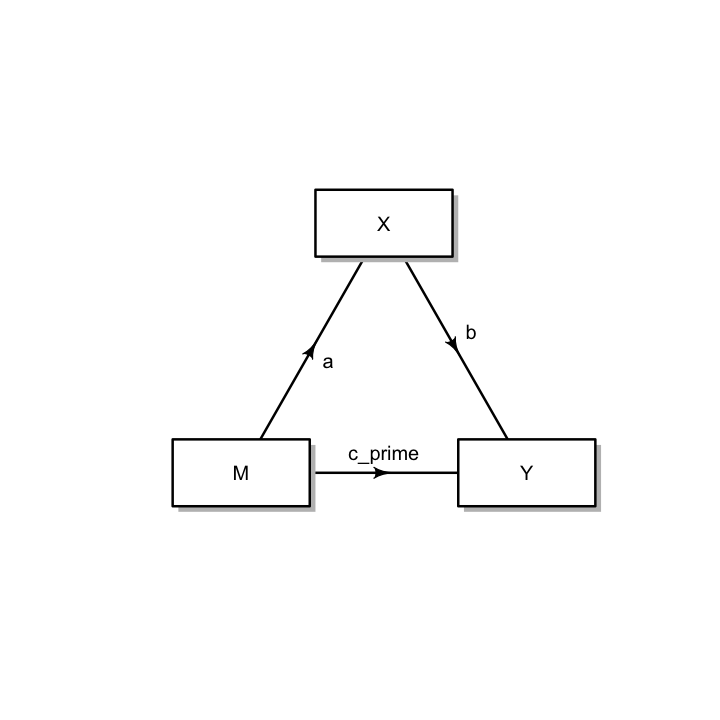

In [16]:
data <- c(
    0, "a", 0,
    0, 0, 0,
    "b", "c_prime", 0
)
M <- matrix(nrow = 3, ncol = 3, byrow = TRUE, data = data)
plot <- plotmat(M,
    pos = c(1, 2),
    name = c("X", "M", "Y"),
    box.type = "rect", box.size = 0.12, box.prop = 0.5, curve = 0
)

Nel modello di mediazione di base abbiamo tre variabili chiave: la variabile indipendente $X$, la variabile dipendente $Y$ e il mediatore $M$. La freccia da $X$ a $M$ (etichettata con 'a') rappresenta l'effetto di $X$ su $M$. La freccia da $M$ a $Y$ (etichettata con 'b') rappresenta l'effetto di $M$ su $Y$, mentre la freccia tratteggiata da $X$ a $Y$ (etichettata con "c'") rappresenta l'effetto diretto di $X$ su $Y$, escludendo la mediazione di $M$.

Possiamo formalizzare il modello statistico di mediazione in equazioni di regressione lineare come segue:

$$ M = a_0 + a \times X + e_M $$

$$ Y = b_0 + b \times M + c' \times X + e_Y $$

Nella prima equazione lineare, $M$ è regredito su $X$ con un'intercetta $a_0$, pendenza $a$ e termine di errore $e_M$. Questa equazione rappresenta il percorso $X \rightarrow M$ con $a$ come effetto di $X$ su $M$. Nella seconda equazione, $Y$ è regredito su $M$ e $X$ con un'intercetta $b_0$, pendenze $b$ e $c'$ e termine di errore $e_Y$. Questa equazione rappresenta due percorsi: $M \rightarrow Y$ e $X \rightarrow Y$, con $b$ come effetto di $M$ su $Y$ e $c'$ come effetto diretto di $X$ su $Y$.

Nel contesto della modellazione di equazioni strutturali, il metodo più comune per calcolare gli effetti diretti, indiretti e totali si basa sul prodotto dei coefficienti, come riassunto nelle seguenti formule:

- Effetto diretto = $c'$
- Effetto indiretto = $b \times a$
- Effetto totale = $c' + b \times a$


### Stima degli Effetti Diretti, Indiretti e Totali

Le tecniche di modellazione di equazioni strutturali permettono di stimare tutti i parametri (a, b, c') simultaneamente, date le specifiche del modello per i dati. Di conseguenza, possiamo utilizzare le seguenti formule per stimare gli effetti diretti, indiretti e totali dai dati:

- Effetto diretto = $\hat{c}'$
- Effetto indiretto = $\hat{b} \times \hat{a}$
- Effetto totale = $\hat{c}' + \hat{b} \times \hat{a}$ 

dove $\hat{a}$ è una stima di $a$, e così via. Gli errori standard stimati di questi effetti possono poi essere calcolati utilizzando metodi asintotici standard, supportato dalla maggior parte dei software SEM.

### Analisi con `lavaan`

Il caso presente prende in considerazione BFLX come variabile endogena, MNF come variabile esogena e END come variabile mediatrice. Utilizzando Mplus, Barbeau, Boileau, Sarr e Smith (2019) hanno identificato i seguenti coefficienti di percorso: $a = 0.37$, $b = 0.29$ e $c = 0.34$.

Procediamo con l'analisi utilizzando il pacchetto `lavaan` in R. Cominciamo definendo il modello di mediazione.

In [17]:
mod <- "
  # direct effect
  BFLX ~ c*MNF
  # mediator
  BFLX ~ b*END
  END ~ a*MNF

  # indirect effect (a*b)
  ab := a*b
  # total effect
  total := c + (a*b)
"

Adattiamo il modello ai dati.

In [18]:
fit <- sem(
    mod,
    sample.cov = dat_cov,
    sample.nobs = 192
)

Esaminiamo i risultati:

In [19]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                               125.849
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -480.945
  Loglikelihood unrestricted model (H1)       -480.945
                                                  

Generiamo un diagramma di percorso.

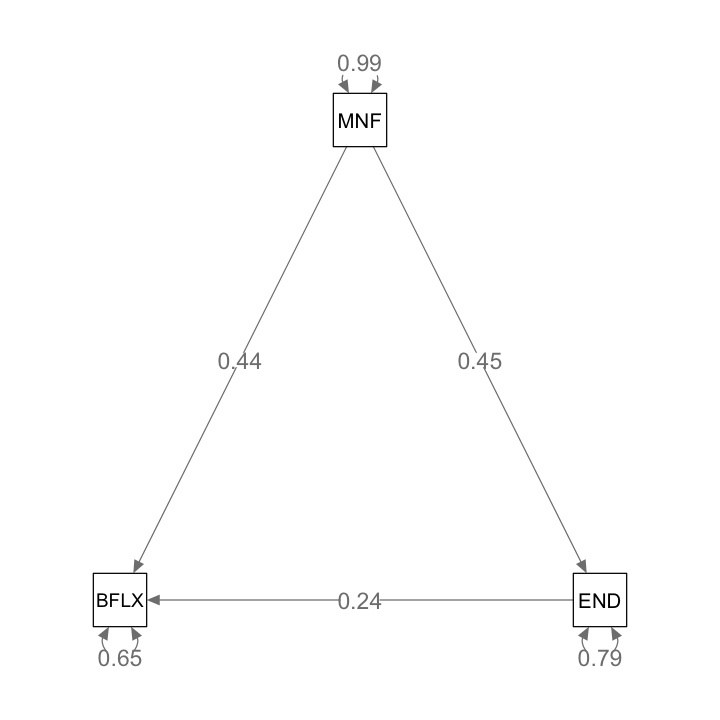

In [20]:
semPlot::semPaths(
    fit,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)

I coefficienti di percorso sono simili, ma non identici, a quelli trovati con Mplus. 

L'effetto diretto di MNF (Need Frustration) su  BFLX (Body Inflexibility) è uguale a 0.44.  L'effetto totale è $0.44 + 0.45*0.24 = 0.55$. L'effetto di mediazione è uguale a $0.45*0.24 = 0.109$. L'outout di `lavaan` fornisce anche gli errori standard e il test che tali effetti siano uguali a zero.

Le correlazioni tra le variabili sono esprimibili nei termini dei coefficienti di percorso.  Per esempio la correlazionetra BFLX e MNF è

In [21]:
.44 + .45 * .24

[1] 0.548

La correlazione tra BFLX e END è

In [22]:
.24 + .44 * .45

[1] 0.438

L'output di lavaan fornisce anche la porzione di varianza che viene spiegata dalle variabili esogene per le due variabili endogene nel modello.

Per esempio, la varianza spiegata di `END` è

In [23]:
0.45^2

[1] 0.2025

come riportato dall'output di lavaan.  

Continuiamo con l'analisi di questi dati e esaminiamo ora un modello di path analisi più complesso (Fig. 4 di Barbeau et al., 2019). Usando la sintassi di `lavaan`, il modello diventa

In [24]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction,
# MNF – Mean Need Frustration,
# BULS – Bulimic Symptoms
mod <- "
  BULS ~ MNF + BFLX
  BFLX ~ END + MNF
  END ~ MNS + MNF
"

Adattiamo il modello ai dati.

In [25]:
fit2 <- sem(
    mod,
    sample.cov = dat_cov,
    sample.nobs = 192
)

Esaminiamo la soluzione ottenuta.

In [26]:
summary(fit2, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6.16 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 8.229
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.042

Model Test Baseline Model:

  Test statistic                               239.501
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.932

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -700.169
  Loglikelihood unrestricted model (H1)       -696

Generiamo il diagramma di percorso.

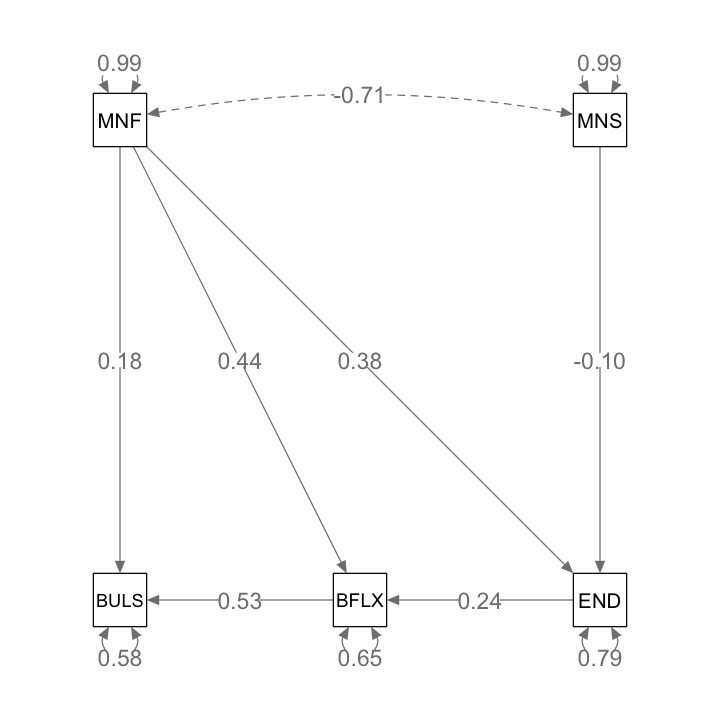

In [27]:
semPlot::semPaths(
    fit2,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)

Anche in questo caso i coefficienti di percorso sono simili, ma non identici, a quelli riportati da Barbeau et al. (2019). Gli autori riportano una varianza spiegata di END pari a 0.209; con `lavaan` si ottiene 0.208.  Per BFLX gli autori riportano 0.292; `lavaan` ottiene 0.349. Per BULS gli autori riportano 0.478; con `lavaan` si ottiene 0.419. 

Calcoliamo, ad esempio, la correlazione tra MNF e BULS prevista dal modello, combinando gli effetti diretti e indiretti. Questo processo consiste nel sommare gli effetti diretti tra queste due variabili con quelli indiretti mediati da altre variabili nel modello.

In [28]:
-.71 * -.10 * .24 * .53 +
.38 *.24 * .53 +
.44 * .53 +
.18

[1] 0.4705672

Il valore trovato corrisponde bene al valore osservato nel campione, che è pari a 0.47.

## Commenti e considerazioni finali

In questo capitolo introduttivo sull'analisi dei percorsi, abbiamo esaminato un approccio statistico per la comprensione e l'analisi delle interazioni tra variabili in un dato sistema. Utilizzando l'analisi dei percorsi per decomporre la correlazione o la covarianza, disponiamo di un metodo efficace per delineare le associazioni tra le variabili e mappare le loro potenziali connessioni causali. Questo strumento si rivela particolarmente utile per descrivere in modo chiaro e strutturato le relazioni tra diverse variabili, facilitando l'interpretazione dei loro legami e interazioni all'interno del modello considerato.